## Machine Learning

- Admin
    - Take-home exam grades out
    - HW1 peer-reviews due by the end of today
    - Presentation dates are set!
- Python is one of the premier languages for machine learning
    - one of the most extensive libraries used is `scikit-learn`
    - Can be used for:
    - Data processing 
    - Feature Selection
    - Models
    - Parameter Tuning


## What is machine learning?

- Rather than caring about how one particular variable affects the outcome, machine learning is about *prediction*.

$$
y = f(x;\varepsilon)
$$

- The goal is to get a get $\hat{y}$
- The different models we choose are basically trying to find a suitable function $f$.
    $f$ can be defined with a functional form (polynomial, linear) or through a complicated non-linear function (tree methods)

## Supervised vs. Unsupervised

- Machine learning can be broadly broken down into supervised, unsupervised, and reinforcement learning (not discussed here)
    - Supervised: There is a "target" or "label" to learn
        - In this case, $y$ is known and and $f$ is found
    - Unsupervised: No $y$; try to find patterns in the data

## Classification vs. Regression

- In machine learning there is natural division between problems: classification and regression
- This is determined by the form of $y$. 
    - If $y$, the label, is binary/categorical:  classification
        - If there are multiple categories (cat, dog, bird): multi-class
        - If something can be multiple labels at the same time (mammal, bird, reptile -> platypus): multi-label
    - If $y$ is continuous: regression
- Note: $y$ need not be a vector, you can predict multiple outcomes at the same time: multi-output

## Data

- Most data processing can be done in `pandas`
- `sklearn` plays well with `pandas` 
- Data quality is, as always, the most important thing with ML
    - Garbage in, garbage out
- All the skills you gained about data for econometrics applies to ML as well
    - This means, missing values, outliers, and measurement error
    - This can all have large effects on performance
- Additionally, `sklearn` provides functions for data processing such as normalization, "one-hot encoding" (creating dummies) and others
- `sklearn` provides tools for creating "pipelines" that feed data processing into models for reproducible flows


## The Basic ML Workflow

```mermaid
graph LR
    A[Data Cleaning] --> B[Data Processing] --> C["Data Split (Training/Test/Validation)"] --> D[Parameter Tuning] --> E[Model Training] --> F[Predict on Testing Set] --> G[Adjust]  --> B 
```

- Notice that you might need to iterate until you get to a model that is reliable and predicts well

## The Golden Rule for ML

- The most important rule in ML is about data contamination
    - No matter what you do, it's important to make sure that training data doesn't affect testing data in a way that might inadvertantly transfer information.
        - This can apply to the way you process data
            - Normalizing data using both training and testing dataset
            - Splitting data in a way that the same observations are in both (this can happens with hierarchical data)
            

## Data Splitting

- Data should be split at least into two parts:
    - Training and testing
    - All data processors should be fit on only the training data to minimize the chances of contamination
- Often there are parameters that need to be tuned and optimized in the model  
    - Training - Validation - Testing
    - Train and test on validation
        - Iterate and find best parameters
        - Then Train on Training + Validation and test on Testing

## Why isn't that enough?

- When you randomly split the data, the training and testing sets might just have specific attributes that you get in the "luck" of the draw
    - Perhaps your random sample has too much of a particular label, or too little of a particular variable
- To minimize this, you can split the data into multiple parts to minimize that any one split of the data has too much "specificity."
- This is called Kfold Splitting and training and testing on each subset is called *cross-validation*.

![](figures/sphx_glr_plot_cv_indices_002.png)

## Parameter Tuning

- Sometimes some models have extra parameters that need to be calibrated/tuned
- You can find this parameter using "grid-search" cross-validation
    - Essentially brute force search on different parameters settings and optimal numbers are found by cross-validation

## Overfitting vs. Underfitting

- This is an important concept in ML as it is what determines whether the model is any good once you start predicting out-of-sample
- Overfitting is why we might want to do k-fold cross-validation
    - We don't want our model ot learn any specific features of the DATA sample we have
- This brings us back to the idea of bias vs. variance.
    - Bias in ML is a little different than in causal inference (although it's really the same thing)

Recall that $MSE = E(Y - \hat{Y})^2$

You can decompose this to the the canonical expression that $MSE = Bias^2 + Variance$


In causal econometrics, we usually start with the notion that we want to find an estimator where $Bias=0$ and then we find the best unbiased estimator for some class of models
- For linear models, that's OLS

In ML, bias is not something to avoid completely, but it is something to reduce as it reduces overall error
    - often comes from model misspecification

- There is a Bias-Variance tradeoff and in ML the driving force is model/algorithmic complexity. 

![](figures/Copy-of-Add-a-subheading5.png)

If a model is very misspecified and does not fit the data well, it is *biased* and is said to be "underfit"

If a model fit the data too well, and has very low variance, but is not generalizable to data outside the sample.

![](figures/overfitting-and-underfitting-wrt-model-error-vs-complexity-768x443.png)




## Getting Started

```
pip install scikit-learn
```

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Different scalers comparison: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section
from sklearn.linear_model import LassoCV, Lasso, LinearRegression
from sklearn.datasets import load_iris, make_regression, make_blobs, load_diabetes, make_classification
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import KFold, train_test_split, ValidationCurveDisplay, cross_validate, LearningCurveDisplay, GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier

## Unsupervised Learning

In [3]:
features, target =  make_blobs(n_samples=1000, centers=5)

In [7]:
model = KMeans(n_clusters=5)

y_pred = model.fit_predict(features)

y_pred

/Users/lordflaron/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 0, 4, 0, 0, 3, 4, 0, 0, 0, 0, 3, 3, 4, 4, 2, 0, 2, 3, 0, 0,
       4, 1, 3, 4, 3, 1, 2, 3, 4, 0, 0, 2, 0, 0, 0, 0, 4, 2, 1, 2, 4, 2,
       1, 3, 3, 4, 0, 4, 4, 0, 4, 2, 2, 0, 0, 0, 0, 3, 3, 1, 4, 0, 4, 0,
       0, 4, 4, 3, 2, 3, 1, 1, 3, 2, 1, 0, 1, 0, 4, 3, 3, 3, 0, 2, 3, 3,
       1, 1, 3, 0, 1, 1, 2, 4, 2, 3, 4, 0, 2, 4, 2, 4, 1, 2, 2, 0, 0, 2,
       4, 4, 4, 3, 4, 2, 3, 0, 1, 1, 3, 1, 4, 0, 1, 3, 1, 4, 0, 0, 0, 0,
       4, 3, 0, 3, 4, 3, 4, 3, 1, 2, 0, 0, 4, 3, 1, 1, 4, 2, 1, 1, 1, 4,
       4, 3, 4, 4, 0, 4, 2, 4, 1, 4, 0, 4, 0, 0, 0, 0, 2, 0, 2, 2, 2, 4,
       3, 4, 3, 1, 3, 0, 2, 1, 2, 1, 1, 2, 1, 3, 0, 4, 2, 0, 4, 4, 4, 2,
       3, 2, 1, 2, 0, 0, 3, 4, 2, 3, 0, 2, 2, 2, 0, 4, 4, 0, 2, 1, 1, 3,
       4, 1, 2, 1, 1, 0, 1, 3, 2, 3, 3, 2, 1, 2, 1, 3, 3, 0, 3, 1, 4, 3,
       4, 1, 3, 0, 2, 3, 1, 1, 4, 4, 4, 0, 2, 4, 0, 4, 3, 3, 0, 2, 0, 1,
       0, 3, 0, 3, 2, 1, 0, 2, 4, 0, 3, 3, 2, 3, 1, 3, 1, 2, 0, 3, 3, 2,
       3, 0, 4, 4, 0, 3, 1, 0, 4, 1, 2, 3, 1, 3, 0,

<Axes: >

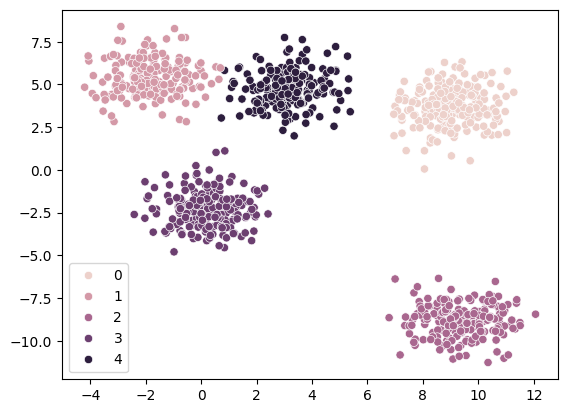

In [8]:
sns.scatterplot(x = features[:, 0], y=features[:,1], hue = y_pred)

## Supervised Learning

-  For this one, let's focus on a linear model that can "regularize", and set some coefficients to 0.
- This is called a L-1 regularized linear model or lasso model


$$
\hat{\beta} = \argmin_\beta \sum_i^{n} (y_i - \sum_j^p X_{ij}\beta_j)^2 + \alpha \sum_j^p |\beta_j|
$$

- minimize the sum of squared residuals and a non-negativity constraint on $\beta_i>0$ that is "sensitive" by the factor $\alpha$
- In this case, we have a supervised model; we have a "target" to predict

In [9]:
X, y = make_regression(noise=4, random_state=0, n_samples=100, n_features=200)

rng = np.random.default_rng(123)

In [10]:
df = (
    pd.DataFrame(X)
    .rename(columns = lambda i: f"x_{i}")
    .assign(y=y)
    )

In [11]:
df

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_191,x_192,x_193,x_194,x_195,x_196,x_197,x_198,x_199,y
0,-0.474107,1.317423,0.169856,-0.098936,1.910781,1.299683,0.705267,0.946540,-0.756481,2.160671,...,0.324677,-0.200513,0.119957,0.403164,-1.249444,2.485017,0.240003,0.791284,-0.590032,41.478362
1,-0.643029,2.080205,0.567826,-1.141708,1.334137,-0.529796,-0.115697,0.718440,1.671679,-0.724720,...,-0.354654,-1.211100,-0.263858,0.657179,0.958952,0.544154,0.491304,-0.255289,-1.862350,-38.122529
2,-0.408286,-0.636161,1.766742,2.059215,2.126039,-0.686504,0.084188,1.135392,0.358543,-1.534820,...,-0.645769,-0.578863,1.243770,-0.541480,-0.414337,-0.710470,1.286947,-1.724322,-0.419512,-82.988342
3,1.705586,1.371330,-0.316912,-1.052778,0.888417,1.960914,0.294599,0.237399,0.292283,-0.760276,...,0.132937,1.103324,1.275549,-0.448981,1.370400,0.789433,-0.095959,2.491486,0.770885,7.894163
4,0.347062,-0.991889,-1.025179,0.139498,-0.859405,0.469545,0.493876,-1.541678,-1.755489,1.230450,...,-0.968920,-0.041353,-0.360438,-0.182652,0.068130,-0.645297,-0.699617,-1.500188,0.609639,-261.075095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.293779,0.721699,0.001630,2.075823,-0.014429,-0.222857,-1.494804,0.818546,-0.063834,0.322195,...,0.655928,0.659182,-0.177976,0.346148,0.850839,-0.240315,-1.225037,-1.096530,0.334099,13.312561
96,2.347434,1.494072,-0.328012,-1.174913,0.035647,1.030268,0.807634,-2.025316,0.649762,0.714434,...,-0.828985,-1.249553,-0.109784,-0.714128,0.906317,0.727689,0.683909,-0.254569,-1.309056,132.762015
97,-0.689934,-0.610009,-0.760614,1.536072,0.496656,-0.643182,0.792627,1.796641,0.407969,-0.416808,...,1.322596,-0.647158,0.945243,-0.395039,0.413446,-0.432029,1.955758,1.894316,-0.098225,414.782584
98,-0.868922,-0.955843,-0.664878,-0.823549,0.538549,0.728398,0.101468,0.623174,1.224730,-0.938476,...,-0.153765,-1.284398,-0.894170,-0.388252,1.887422,0.670609,-0.276421,1.912941,-0.072911,-142.610381


In [12]:
import warnings; warnings.filterwarnings('ignore')

res = smf.ols("y ~ " + ' + '.join(df.drop(columns='y').columns), data=df).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                nan
Time:                        12:16:18   Log-Likelihood:                 2714.8
No. Observations:                 100   AIC:                            -5230.
Df Residuals:                       0   BIC:                            -4969.
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0295        inf         -0        nan         nan         nan
x_0           -5.8750        inf         -0        nan         nan         nan
x_1            1.9426        inf          0        nan         nan         nan
x_2            4.6700        inf          0        nan         nan         nan
x_3            1.4659        inf          0        nan         nan         nan
x_4           -4.2351        inf         -0        nan         nan         nan
x_5          -13.5535        inf         -0        nan         nan         nan
x_6            6.5235        inf          0        nan         nan         nan
x_7           -6.3044        inf         -0        nan         nan         nan
x_8            0.8235        inf          0        nan         nan         nan
x_9           -1.8063        inf         -0        nan         nan         nan
x_10          -9.4032        inf         -0        nan         nan         nan
x_11          -4.1970        inf         -0        nan         nan         nan
x_12          -7.8088        inf         -0        nan         nan         nan
x_13           9.7982        inf          0        nan         nan         nan
x_14          -5.7171        inf         -0        nan         nan         nan
x_15           1.0646        inf          0        nan         nan         nan
x_16           1.6324        inf          0        nan         nan         nan
x_17          12.7427        inf          0        nan         nan         nan
x_18           2.8498        inf          0        nan         nan         nan
x_19          -7.7846        inf         -0        nan         nan         nan
x_20          -7.7725        inf         -0        nan         nan         nan
x_21           0.8112        inf          0        nan         nan         nan
x_22           6.1047        inf          0        nan         nan         nan
x_23          -1.6940        inf         -0        nan         nan         nan
x_24          15.9195        inf          0        nan         nan         nan
x_25          -2.7578        inf         -0        nan         nan         nan
x_26          11.6216        inf          0        nan         nan         nan
x_27           4.7124        inf          0        nan         nan         nan
x_28          -0.9382        inf         -0        nan         nan         nan
x_29           9.5861        inf          0        nan         nan         nan
x_30           0.4808        inf          0        nan         nan         nan
x_31          18.6596        inf          0        nan         nan         nan
x_32          -7.7363        inf         -0        nan         nan         nan
x_33          11.4595        inf          0        nan         nan         nan
x_34           6.3885        inf          0        nan         nan         nan
x_

In [14]:
model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [15]:
model.coef_

# but coefficient specific SE is not easily output

array([-5.72458448e+00,  2.01988367e+00,  4.40143737e+00,  2.00558829e+00,
       -4.06873760e+00, -1.35071109e+01,  6.62241777e+00, -6.39400168e+00,
        8.15346365e-01, -1.60408537e+00, -9.41583093e+00, -4.10753645e+00,
       -7.81035074e+00,  9.68532357e+00, -5.80387913e+00,  1.17343414e+00,
        1.68277167e+00,  1.24967872e+01,  3.00379916e+00, -7.80070271e+00,
       -7.95511680e+00,  8.31429572e-01,  6.00720014e+00, -1.57588435e+00,
        1.57668548e+01, -2.80535970e+00,  1.13861301e+01,  4.59204132e+00,
       -9.32215203e-01,  9.41574413e+00,  4.74964745e-01,  1.87651357e+01,
       -7.76096841e+00,  1.16124504e+01,  6.22548523e+00,  9.45024166e+00,
        3.85850506e+00,  8.57245169e+00,  2.03379977e+00, -1.71936112e+01,
        1.54632234e+01,  2.17745866e+00,  1.38682772e+01,  1.07195173e+01,
       -1.27875259e+01,  3.61499610e+00, -1.79062892e+00,  1.61465440e+00,
        3.76555125e+01, -1.46645627e+01,  8.13162334e+00, -1.48144045e+01,
        9.48715667e+00,  

0.2402319378288178


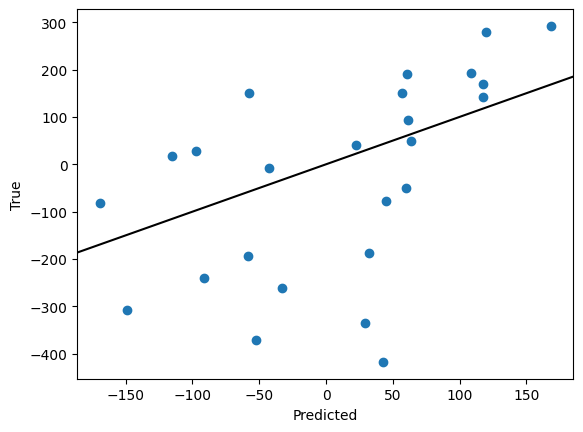

In [19]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)

scaler = StandardScaler().fit(X_train)

# With scaled
X_scaled = scaler.transform(X_train)

model = LinearRegression().fit(X_scaled, y_train)

y_pred = model.predict(scaler.transform(X_test))

fig, ax = plt.subplots()

ax.scatter(y_pred, y_test)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.axline(xy1=(0,0), slope=1, color='black', )


print(r2_score(y_test, y_pred))


## Lasso

0.9893669350816761


0.4413793103448276

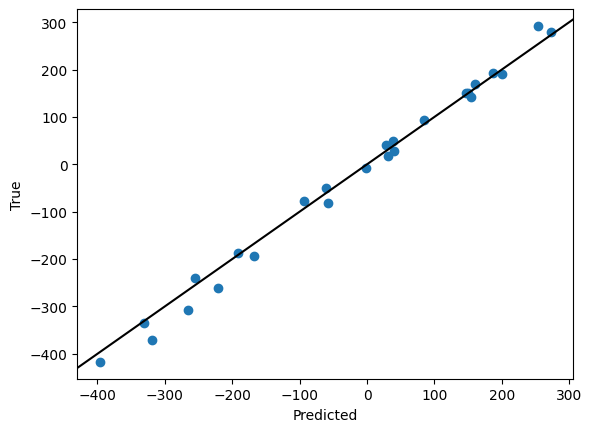

In [21]:
alphas = np.linspace(0.1,1, 30)

lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)

scaler = StandardScaler().fit(X_train)

# With scaled
X_scaled = scaler.transform(X_train)

lasso_cv.fit(X_scaled, y_train)

y_pred_lasso = lasso_cv.predict(X_test)

fig, ax = plt.subplots()

ax.scatter(y_pred_lasso, y_test)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.axline(xy1=(0,0), slope=1, color='black', )

print(r2_score(y_test, y_pred_lasso))

lasso_cv.alpha_

In [409]:
## which features go to 0?

lasso_cv.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -5.25640044e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -4.78931151e-01, -0.00000000e+00,
       -0.00000000e+00,  8.14645526e-02,  0.00000000e+00, -0.00000000e+00,
       -2.35845668e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.98458900e-01, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.72353248e+01,
        0.00000000e+00,  1.74933791e+01,  0.00000000e+00,  2.60633611e-01,
       -0.00000000e+00,  1.11537103e-01,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  3.28934850e+01, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.73139860e+01, -0.00000000e+00, -0.00000000e+00, -1.87398259e-01,
        0.00000000e+00, -

In [410]:
res.params.values

array([-1.02954667e+00, -5.87497394e+00,  1.94260117e+00,  4.66997408e+00,
        1.46587103e+00, -4.23508842e+00, -1.35535056e+01,  6.52349269e+00,
       -6.30438011e+00,  8.23517642e-01, -1.80631726e+00, -9.40320849e+00,
       -4.19700996e+00, -7.80879576e+00,  9.79815491e+00, -5.71710100e+00,
        1.06456367e+00,  1.63244618e+00,  1.27426834e+01,  2.84983900e+00,
       -7.78463621e+00, -7.77248917e+00,  8.11191606e-01,  6.10471033e+00,
       -1.69395732e+00,  1.59195074e+01, -2.75776181e+00,  1.16216180e+01,
        4.71239504e+00, -9.38190266e-01,  9.58609669e+00,  4.80750948e-01,
        1.86595763e+01, -7.73629374e+00,  1.14595105e+01,  6.38849918e+00,
        9.73959506e+00,  3.87467483e+00,  8.79220026e+00,  1.91959489e+00,
       -1.72567823e+01,  1.57212263e+01,  1.99372904e+00,  1.36380354e+01,
        1.07814100e+01, -1.27453762e+01,  3.79699867e+00, -1.76053173e+00,
        1.60128707e+00,  3.75795517e+01, -1.47149091e+01,  8.19979097e+00,
       -1.49543725e+01,  

- You can do the same thing with more regularization:
    - Add L2 regularization: Ridge Regression

$$
\hat{\beta} = \argmin_\beta \sum_i^{n} (y_i - \sum_j^p X_{ij}\beta_j)^2 + \alpha \sum_j^p \beta_j^2
$$

- Both L1 and L2: ElasticNet

$$
\hat{\beta} = \argmin_\beta \sum_i^{n} (y_i - \sum_j^p X_{ij}\beta_j)^2 + \alpha_1 \sum_j^p |\beta_j| + \alpha_2 \sum_j^p \beta_j^2
$$

- The need for each will be dependent on your case
    - L2 regularization has better properties (convex cost function)
    - L1 actually makes some features equal to 0!
        - So better for selecting features and making a smaller sample of features
        - Lasso is good, for example, for reducing the number of features to a number less than N, so OLS is more well-defined


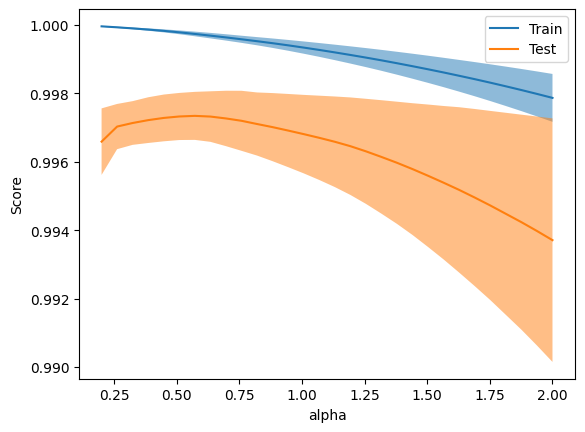

In [24]:

lasso = Lasso()

scaler = StandardScaler().fit(X_train)

# With scaled
X_scaled = scaler.transform(X_train)

param_name, param_range = 'alpha', np.linspace(0.2,2, 30)

ValidationCurveDisplay.from_estimator(
     lasso, X_scaled, y_train, param_name=param_name,
     param_range=param_range,
)

- Training Accuracy goes down
    - Why?
    - Because you're penalizing the model;
        - get lower training performance, but increase out-of-sample testing performance
    - Testing accuracy goes up at its optimum and then reduces as well; evidence of underfitting
    

## SVM

- Support Vector Machines are a popular model to use as they are scalable, easy to understand and perform well
- Usually used in classification models, it tries to find a "decision boundary" between points that divides up different categories
- Two parameters important to tune, regularization parameter, C, the kernel, and gamma, a parameter that determines how "curvy" to make the separation

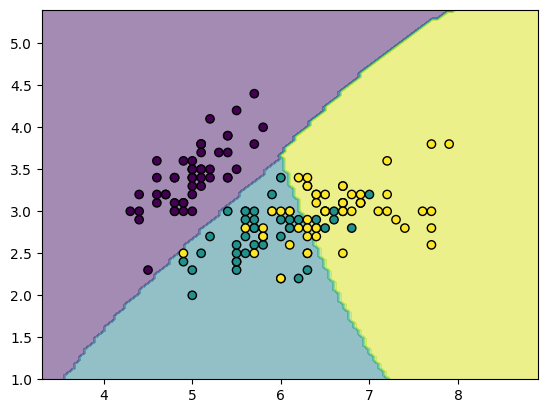

In [26]:
X, y = load_iris(return_X_y=True)

X = X[:, :2]

model = SVC(kernel='rbf') #'linear'

model.fit(X, y)

disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method='predict', alpha=0.5)

disp.ax_.scatter(X[:, 0], X[:, 1], c = y, edgecolor='k')



## Cross-validation



In [32]:
X, y = make_regression(noise=4, random_state=0, n_samples=1000, n_features=1000)

folds = KFold(5)

model = LinearRegression()

cross_validate(model, X, y, cv=folds)

{'fit_time': array([0.30741501, 0.31901526, 0.36057091, 0.28500795, 0.2236259 ]),
 'score_time': array([0.00075197, 0.0007329 , 0.00081205, 0.00082088, 0.00080204]),
 'test_score': array([0.68787865, 0.78642959, 0.82285445, 0.76529883, 0.80579695])}

## Illustrating Underfitting and Overfitting by changing `gamma`

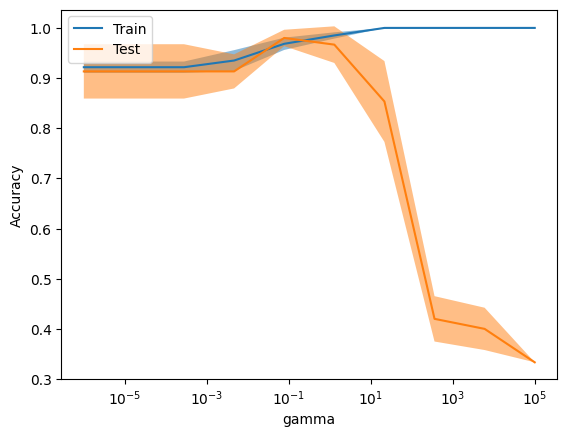

In [33]:
X, y = load_iris(return_X_y=True)


disp = ValidationCurveDisplay.from_estimator(
    SVC(kernel='rbf'),
    X,
    y,
    param_name="gamma",
    param_range=np.logspace(-6, 5, 10),
    score_type="both",
    n_jobs=2,
    score_name="Accuracy",
)

## Is more data always better?

- Oftentimes, we think that increases to sample size are always a good thing
- But although you might get increases to accuracy, there a decreasing returns, especially if you're not doing anything to get data to fill out parts of the distribution you don't have


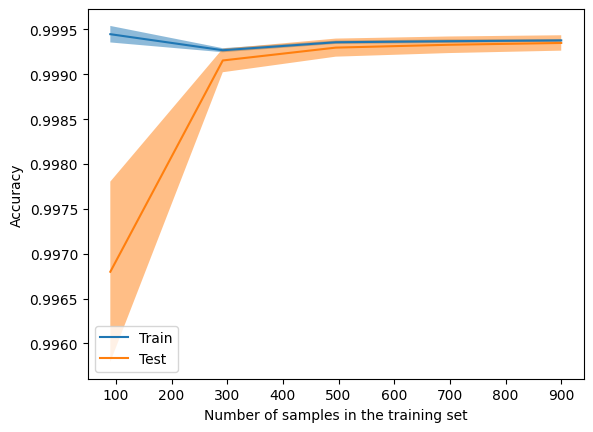

In [34]:
X, y = make_regression(noise=4, random_state=0, n_samples=1000, n_features=1000)

disp = LearningCurveDisplay.from_estimator(
    Lasso(),
    X,
    y,
    cv=10,
    score_type="both",
    n_jobs=2,
    score_name="Accuracy",
)

## Tree Models

- Decisions tree models (RandomForest, gradient boosting) are great at capturing non-linearities in very nonlinear data
- But they become overfit very fast
- There are many parameters to tune with decision trees, and they require validation 
    - Can be used for classification or regression
    

## Classification

- For classification problems, the goal of a decision tree is to find the correct cuts that will predict the classes well

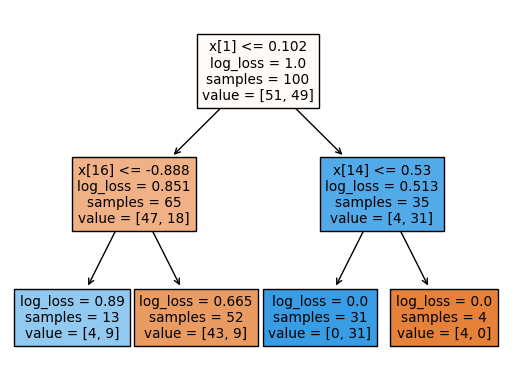

In [514]:
X_t,y_t = make_classification(random_state=1, class_sep=.3)


model = DecisionTreeClassifier(max_depth=2, criterion='log_loss') # 1,2,3,4,5

model.fit(X_t, y_t)

plot_tree(model, filled=True);

In [515]:
model.feature_importances_

array([0.        , 0.49593993, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.33335725,
       0.        , 0.17070282, 0.        , 0.        , 0.        ])

In [521]:
c_val = cross_validate(model, X_t, y_t)

c_val

{'fit_time': array([0.00127578, 0.00098801, 0.00091505, 0.0008781 , 0.00081205]),
 'score_time': array([0.00052619, 0.00041103, 0.00038409, 0.00037098, 0.00034261]),
 'test_score': array([0.75, 0.65, 0.65, 0.8 , 0.75])}

In [522]:
c_val['test_score'].mean()

0.72

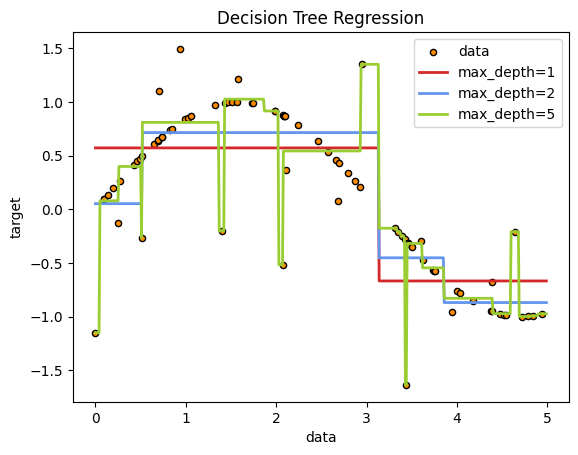

In [523]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=1)

regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_3, color="tab:red", label="max_depth=1", linewidth=2)
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Tuning a Model with many Parameters

- For some models, like Lasso, `sklearn` provides a CV method that can tune it, because you only have one parameter to tune
- For models like tree models, you often have to tune multiple parameters that have to do with the evolution of the behavior of the tree
- You can use a grid search in order to tune all those parameters


In [524]:

param_grid = {'max_depth': [1,2,3,4,5,6,7,10,20,30], 
   'splitter': ['best', 'random'], 
   'min_samples_split' : np.linspace(0,1,5),
   'max_features' : np.linspace(0,1,5)
   }

model = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_t, y_t)

gs = GridSearchCV(model, param_grid=param_grid, cv=10, verbose=10, n_jobs=10)

gs.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10; 1/500] START max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best
[CV 1/10; 1/500] END max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best;, score=nan total time=   0.0s
[CV 2/10; 1/500] START max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best
[CV 3/10; 1/500] START max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best
[CV 2/10; 1/500] END max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best;, score=nan total time=   0.0s
[CV 4/10; 1/500] START max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best
[CV 3/10; 1/500] END max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best;, score=nan total time=   0.0s
[CV 4/10; 1/500] END max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best;, score=nan total time=   0.0s
[CV 5/10; 1/500] START max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 20, 30],
                         'max_features': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'min_samples_split': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'splitter': ['best', 'random']},
             verbose=10)

In [525]:
gs.best_params_

{'max_depth': 6,
 'max_features': 0.75,
 'min_samples_split': 0.25,
 'splitter': 'best'}

In [526]:
gs.best_score_

0.8982142857142857

In [532]:
gs_best = gs.best_estimator_

gs_best

DecisionTreeClassifier(max_depth=6, max_features=0.75, min_samples_split=0.25)

In [533]:
gs_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=0.75, min_samples_split=0.25)

In [534]:
cross_validate(gs_best, X_t, y_t)['test_score'].mean()

0.74